# Trend Changes

In [1]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [2]:
#Prophet deregisters the Pandas converters in its code.
#Please check https://darektidwell.com/typeerror-float-argument-must-be-a-string-or-a-number-not-period-facebook-prophet-and-pandas/
pd.plotting.register_matplotlib_converters()

In [3]:
df = pd.read_csv('HospitalityEmployees.csv')

In [4]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

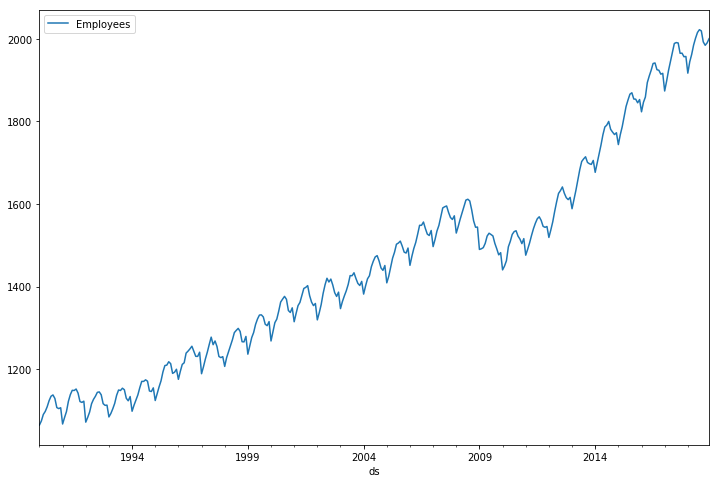

In [5]:
df.plot(x='ds',y='y',figsize=(12,8),label='Employees')

In [6]:
len(df)

348

In [7]:
len(df) - 12

336

In [8]:
train = df.iloc[:336]
test = df.iloc[336:]

In [9]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\saurabhs\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



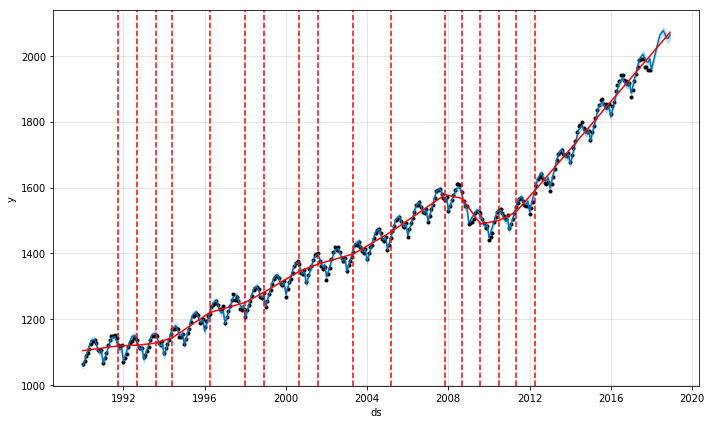

In [10]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)